### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [90]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

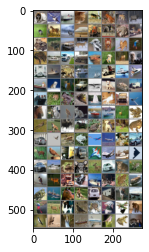

dog   plane ship  cat   deer  frog  frog  deer  bird  horse deer  plane truck horse frog  truck cat   deer  ship  deer  bird  dog   dog   bird  frog  ship  truck truck bird  dog   deer  dog   car   ship  frog  ship  ship  truck ship  ship  ship  dog   cat   car   plane dog   ship  truck ship  frog  frog  frog  ship  cat   truck plane horse cat   bird  cat   ship  ship  deer  frog  bird  dog   deer  horse frog  dog   deer  frog  car   bird  deer  frog  plane plane dog   car   deer  bird  truck truck plane plane ship  plane car   ship  frog  dog   deer  car   cat   deer  bird  deer  truck car   ship  cat   frog  ship  frog  ship  horse dog   car   truck dog   ship  bird  deer  dog   bird  frog  dog   plane dog   bird  bird  bird  ship  plane bird  frog  cat  


In [91]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [92]:
import torch.nn as nn

In [93]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ##### 아래 작성 #####
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5),
            nn.ReLU(),
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(32*32, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
       ##### 아래 작성 #####
       out = self.layer(x)
       out = out.view(out.size(0), -1)
       out = self.fc_layer(out)
       
       return out
       
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  
print(device)
net = Net().to(device)

cuda:0


## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [95]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [96]:
from torchsummary import summary
summary(net, (3, 32, 32), batch_size = 128)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [128, 16, 28, 28]           1,216
              ReLU-2          [128, 16, 28, 28]               0
            Conv2d-3          [128, 32, 24, 24]          12,832
              ReLU-4          [128, 32, 24, 24]               0
         MaxPool2d-5          [128, 32, 12, 12]               0
            Conv2d-6            [128, 64, 8, 8]          51,264
              ReLU-7            [128, 64, 8, 8]               0
         MaxPool2d-8            [128, 64, 4, 4]               0
            Linear-9                 [128, 100]         102,500
             ReLU-10                 [128, 100]               0
           Linear-11                  [128, 10]           1,010
Total params: 168,822
Trainable params: 168,822
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.50
Forward/

## Train

In [97]:
# 모델을 학습

for epoch in range(30):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        #### 아래 작성 #####
        x = inputs.to(device)
        y = labels.to(device)
        optimizer.zero_grad()
        output = net.forward(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.113
[1,   200] loss: 0.100
[1,   300] loss: 0.088
[2,   100] loss: 0.076
[2,   200] loss: 0.072
[2,   300] loss: 0.069
[3,   100] loss: 0.064
[3,   200] loss: 0.060
[3,   300] loss: 0.059
[4,   100] loss: 0.053
[4,   200] loss: 0.051
[4,   300] loss: 0.051
[5,   100] loss: 0.046
[5,   200] loss: 0.047
[5,   300] loss: 0.045
[6,   100] loss: 0.041
[6,   200] loss: 0.041
[6,   300] loss: 0.041
[7,   100] loss: 0.037
[7,   200] loss: 0.037
[7,   300] loss: 0.038
[8,   100] loss: 0.033
[8,   200] loss: 0.034
[8,   300] loss: 0.035
[9,   100] loss: 0.030
[9,   200] loss: 0.031
[9,   300] loss: 0.031
[10,   100] loss: 0.026
[10,   200] loss: 0.028
[10,   300] loss: 0.028
[11,   100] loss: 0.024
[11,   200] loss: 0.025
[11,   300] loss: 0.026
[12,   100] loss: 0.020
[12,   200] loss: 0.022
[12,   300] loss: 0.025
[13,   100] loss: 0.018
[13,   200] loss: 0.021
[13,   300] loss: 0.022
[14,   100] loss: 0.016
[14,   200] loss: 0.018
[14,   300] loss: 0.020
[15,   100] loss: 0

## Test

In [98]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [99]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 68 %


## 클래스별 accuracy 비교

In [100]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.0 %
Accuracy for class: car   is 78.8 %
Accuracy for class: bird  is 51.5 %
Accuracy for class: cat   is 55.6 %
Accuracy for class: deer  is 59.4 %
Accuracy for class: dog   is 54.9 %
Accuracy for class: frog  is 77.0 %
Accuracy for class: horse is 76.1 %
Accuracy for class: ship  is 79.8 %
Accuracy for class: truck is 76.9 %
